# Stats and Politics 1 - Cleaning and EDA

Welcome to the Stats and Politics Cleaning, EDA, and Data Visualization Analysis. Here we will go through the full process of cleaning and organizing a brand new set of datafiles with three different datasets consisting of demographic data, presidential 2012 votes data, and presidential 2016 votes data. This will then be follows by the EDA and lastly providing some interesting and insightful visualizations and analysis using the refined datasets.

In [2]:
# Please run the imports below in order to set up the environment first.
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
# Please run the code below to read in the following CSV data files. The CSV data files include the demographic and presidential voting data for years 2012 and 2016.

# Contains various census statistics for each county; these include things like the racial makeup of the population or the overall economic status.
demographic_df = pd.read_csv('data/demographic_data.csv')

# Contains the number of votes for each major political party within each county for the 2012 elections.
votes2012_df = pd.read_csv('data/presidential_2012_votes.csv')

# Contains the number of votes for each major political party within each county for the 2016 elections.
votes2016_df = pd.read_csv('data/presidential_2016_votes.csv')

In [4]:
# To get a peak at the Demographic dataset.
demographic_df.head()

,state,st,county,FIPS,total_population,citizen_voting_age_population,white_pct,black_pct,hispanic_pct,black_and_hispanic_pct,...,foreign_born_pct,female_pct,caucasian_frac,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
0,Alabama,AL,Autauga,1001,55049.0,40690.0,75.683482,18.370906,2.572254,20.943160,...,1.838362,51.176225,0.76,40.037058,13.978456,53099.0,5.591657,12.417046,75.407229,42.002162
1,Alabama,AL,Baldwin,1003,199510.0,151770.0,83.178788,9.225603,4.366698,13.592301,...,3.269510,51.194928,0.83,35.474412,18.714851,51365.0,6.286843,9.972418,70.452889,42.279099
2,Alabama,AL,Barbour,1005,26614.0,20375.0,45.885624,47.888329,4.309762,52.198091,...,2.859397,46.498084,0.46,37.664387,16.528895,33956.0,12.824738,26.235928,87.132213,67.789635
3,Alabama,AL,Bibb,1007,22572.0,17590.0,74.765196,21.212121,2.223994,23.436116,...,1.351232,46.464646,0.75,37.329435,14.885699,39776.0,7.146827,19.301587,88.000000,68.352607
4,Alabama,AL,Blount,1009,57704.0,42430.0,87.657701,1.557951,8.727298,10.285249,...,4.271801,50.485235,0.88,37.240053,17.192916,46212.0,5.953833,19.968585,86.950243,89.951502


In [5]:
# To view the different columns and their datatypes within the Demographic dataset.
demographic_df.dtypes

state                                      object
st                                         object
county                                     object
FIPS                                        int64
total_population                          float64
citizen_voting_age_population             float64
white_pct                                 float64
black_pct                                 float64
hispanic_pct                              float64
black_and_hispanic_pct                    float64
nonwhite_pct                              float64
foreign_born_pct                          float64
female_pct                                float64
caucasian_frac                            float64
age_29_and_under_pct                      float64
age_65_and_older_pct                      float64
median_household_income                   float64
unemployed_pct_in_civilian_labor_force    float64
less_than_highschool_pct                  float64
less_than_college_pct                     float64


In [6]:
# To get a peak at the Presidential 2012 voter data.
votes2012_df.head()

,year,state,st,county,FIPS,candidate,party,candidatevotes,totalvotes
0,2012,Alabama,AL,Autauga,1001,Barack Obama,democrat,6363.0,23932
1,2012,Alabama,AL,Autauga,1001,Mitt Romney,republican,17379.0,23932
2,2012,Alabama,AL,Autauga,1001,Other,NaN,190.0,23932
3,2012,Alabama,AL,Baldwin,1003,Barack Obama,democrat,18424.0,85338
4,2012,Alabama,AL,Baldwin,1003,Mitt Romney,republican,66016.0,85338


In [7]:
# To view the different columns and their datatypes within the Presidential 2012 voter data.
votes2012_df.dtypes

year                int64
state              object
st                 object
county             object
FIPS                int64
candidate          object
party              object
candidatevotes    float64
totalvotes          int64
dtype: object

In [8]:
# To get a peak at the Presidential 2016 voter data.
votes2016_df.head()

,year,state,st,county,FIPS,candidate,party,candidatevotes,totalvotes
0,2016,Alabama,AL,Autauga,1001,Hillary Clinton,democrat,5936.0,24973
1,2016,Alabama,AL,Autauga,1001,Donald Trump,republican,18172.0,24973
2,2016,Alabama,AL,Autauga,1001,Other,NaN,865.0,24973
3,2016,Alabama,AL,Baldwin,1003,Hillary Clinton,democrat,18458.0,95215
4,2016,Alabama,AL,Baldwin,1003,Donald Trump,republican,72883.0,95215


In [9]:
# To view the different columns and their datatypes within the Presidential 2016 voter data.
votes2016_df.dtypes

year                int64
state              object
st                 object
county             object
FIPS                int64
candidate          object
party              object
candidatevotes    float64
totalvotes          int64
dtype: object

## Part 1: EDA

In [10]:
# Please run the code below to view the size of each data frame and view the amount of rows and columns it contains. You can use the following:

# To get a concise summary of the Demographic data frame.
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   state                                   3114 non-null   object 
 1   st                                      3015 non-null   object 
 2   county                                  3110 non-null   object 
 3   FIPS                                    3114 non-null   int64  
 4   total_population                        3110 non-null   float64
 5   citizen_voting_age_population           3035 non-null   float64
 6   white_pct                               3110 non-null   float64
 7   black_pct                               3110 non-null   float64
 8   hispanic_pct                            2979 non-null   float64
 9   black_and_hispanic_pct                  3110 non-null   float64
 10  nonwhite_pct                            3110 non-null   floa

In [11]:
# To view just the amount of rows and columns found within the Demographic data frame.
demographic_df.shape

(3114, 21)

The data is comprised of three seperete CSV files:

1. Demographic Data (demographic_data.csv):

This is the demographic data which contains various census statistics for each county; these include things like the racial makeup of the population or the overall economic status. The data is over 511.0 KB in size and is comprised of 3114 rows and 21 columns. It contains a combination of seventeen float64 data types, one int64 data type, and three object data types.

Taking a close-up look at the columns within this dataset we can see the state, county, and the total population of a given county. More importantly, what follows is the more valuable data with regards to the voter demographics that is crucial for Presidential voting and understanding the core target, the voters themselves. It is also important to narrow this down to understanding the population of citizens within the legal voting age. This helps us identify and quantify the total amount of legal voters spread across each county, but we must dig deeper in identifying who this citizen voting age population is comprised of in order to fully understand who our voters really are and how they may vote.

To better understand the citizen voting age population it is crucial to consider the following 5 criteria such as age, race, education, employment, and income:

- **Age** *(age_29_and_under_pct / age_65_and_over_pct)* is probably one of the most important demographic metrics as it helps us understand what stage of life a given population is in.  Whether they are young voters who value things such as education, employment, and income to older voters who value things like retirement, pension, and health. This demographic metric can give us greater insight into the lives of our voters, what their expectations may be from a future Presidential candidate, and how they may vote. This also gives us a great understanding of some of the quantitative trends we may see within the other demographic data. **Note:** *While age can be categorical or numerical, within this dataset age_29_and_under_pct / age_65_and_over_pct is categorical as it is using a grouping of ages and not exact age values.*
    
- **Race** and ethnicity is represented in several ways within the dataset, however I would like to focus on the percentage of the population that is white (*white_pct*). Although all race and ethnicities are equally important, white americans represent the racial majority of the country and therefore by using this metric we can not only identify how large this white population is within a given county, but we can also identify the percentage of the non-white population to understand how the country is racially divided. This can be very important in how a county votes because one racial group of voters may have a different outlook on things than that of another racial group, which when accounted for, may sway the vote one way or the other and have larger implications in a Presidential election. **Note:** *white_pct is categorical beacuse it takes quantitative values with qualitative characteristics.*

- **Education** is very important because without a proper education, or at the very least a high school diploma, people might not be able to qualify for college, they may not be qualified for a specific job/career, or they may not be able to become employed at all. The percentage of the population with less than a high school diploma *(less_than_highschool_pct)* is important when understanding how counties vote because it is very well tied in with other demographic metrics and how it impacts them, such as why the unemployement percentage may be high and even why the median household income may be low. This can be due to a high percentage of the population unable to attain their high school diploma, meaning that their may be a need for things such as education funding, educational reform, or funding necessary for educational assistance to help lower that percentage. It may also be tied in to the reason why some of the population may not be able to attain a college diploma which can be related to tuition assistance. **Note:** *(less_than_highschool_pct) is categorical as it is using groupings and not exact values.*

- **Employment** is very important as people need a job in order to sustain themselves and/or their families which is why the unemployment percentage among the civilian labor force *(unemployed_pct_in_civilian_labor_force)* is also important when trying to understand how counties vote. Given that employment is a necessity, understanding unemployment percentage of a county and how it may be tied to other demographic metrics such as age, education, and/or income can be very valuable information. For example, we can draw correlations bewteen a high uneployment percentage and high percentage of a population without a highschool diploma to better understand our voters.  **Note:** *(unemployed_pct_in_civilian_labor_force) is a numeric value.*

- **Income** *(median_household_income)* is important to understand when trying to determine how counties votes. Along with the above mentioned demographic metrics, median household income ties in very well with all of these other metrics as it may impact them or be impacted by them. For example, the income may be low within a given county because the percentage of the population with less than highschool diploma may be high. Or maybe the population is well educated, but the income is low because the age of the majority of the population is well over 65, with the possibily that they may no longer hold jobs due to retirement but are still included in the data. This is why understanding the median household income and how it impacts the way a county votes is crucial. **Note:** *(median_household_income) is a numeric value.*

2. Presidential 2012 Votes Data (presidential_2012_votes.csv):

This is the Presidential 2012 votes data which contains the number of votes for each major political party within each county for the 2012 elections. The data is over 665.4 KB in size and is comprised of 9462 rows and 9 columns. It contains a combination of one float64 data type, three int64 data types, and five object data types.

3. Presidential 2016 Votes Data (presidential_2016_votes.csv):

This is the Presidential 2016 votes data which contains the number of votes for each major political party within each county for the 2016 elections. The data is over 665.4 KB in size and is comprised of 9462 rows and 9 columns. It contains a combination of one float64 data type, three int64 data types, and five object data types.

In [12]:
# To get a concise summary of the Presidential 2012 Votes data frame.
votes2012_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9462 entries, 0 to 9461
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            9462 non-null   int64  
 1   state           9462 non-null   object 
 2   st              9462 non-null   object 
 3   county          9462 non-null   object 
 4   FIPS            9462 non-null   int64  
 5   candidate       9462 non-null   object 
 6   party           6308 non-null   object 
 7   candidatevotes  9462 non-null   float64
 8   totalvotes      9462 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 665.4+ KB


In [13]:
# To view just the amount of rows and columns found within the Presidential 2012 Votes data frame.
votes2012_df.shape

(9462, 9)

In [14]:
# To get a concise summary of the Presidential 2016 Votes data frame.
votes2016_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9462 entries, 0 to 9461
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            9462 non-null   int64  
 1   state           9462 non-null   object 
 2   st              9459 non-null   object 
 3   county          9462 non-null   object 
 4   FIPS            9462 non-null   int64  
 5   candidate       9462 non-null   object 
 6   party           6308 non-null   object 
 7   candidatevotes  9462 non-null   float64
 8   totalvotes      9462 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 665.4+ KB


In [15]:
# To view just the amount of rows and columns found within the Presidential 2016 Votes data frame.
votes2016_df.shape

(9462, 9)

## Part 2: Cleaning

As we begin to clean up all of our data, we can first create new columns for some key data that may be missing or recalculating certain columns to more accurately represent the data we currently have. For example, we have the `age_29_and_under_pct` along with the `age_65_and_older_pct` however we do not know the data for `age_30_to_age_64_pct`. We also have `black_pct`, `hispanic_pct`, `black_and_hispanic_pct`, and `nonwhite_pct`, however many of these values are overlapping or duplicating.

In order to more accurately represent the data, we will create new columns and/or recalculate and update the new data within existing columns below:

In [16]:
# First we will create and calculate the 'age_30_to_age_64_pct' column.
demographic_df['age_30_to_age_64_pct'] = (100 - demographic_df['age_29_and_under_pct'] - demographic_df['age_65_and_older_pct'])

In [17]:
# Then we will calculate the accurate 'hispanic_pct' and update the column.
demographic_df['hispanic_pct'] = (demographic_df['black_and_hispanic_pct'] - demographic_df['black_pct'])

In [18]:
# Next we can calculate and update the 'nonwhite_pct' column with more accurate data to depict all other non-white populations by removing 'black_pct' and 'hispanic_pct' from the current value.
demographic_df['nonwhite_pct'] = (demographic_df['nonwhite_pct'] - demographic_df['black_and_hispanic_pct'])

Next we can remove any further duplicates or unnecessary data:

The `state` column and the `st` column present the same information, with `st` just being the postal abbreviation of the `state` column. Also when viewing the information of the dataset using `demographic_df.info()` we can see that there are 99 instances of missing values. Given that removing this column will not impact the integrity or skew any of the data, it will be removed from the dataset.

Although the `citizen_voting_age_population` column can provide some insight into what portion of the total population are actual voters. The data rest of the demographic data at large is quite unrelated to these values because it instead points to the total population. For example, the race percentages, age groupings, median household income, and education grouping, are all reflective of the total population and not just the citizen voting age population. Trying to correlate any of the other data to the citizen voting age population will not be a true reflection and can cause skewed results. The data is also somewhat incomplete with 79 instances of missing values. 

Column `white_pct` and `caucasian_frac` are essentially duplicates as they present the same information. Given that `white_pct` matches up with the format of the other similar data such as `black_pct`, `hispanic_pct`, and `nonwhite_pct`, we will remove `caucasian_frac`. Similarly, we can remove `black_and_hispanic_pct` as the data is also represented seperately within the `black_pct` and `hispanic_pct` columns. 

Altogether, we will remove columns **`st`**, **`citizen_voting_age_population`**, **`black_and_hispanic_pct`**, and **`caucasian_frac`** from the dataset.

In [19]:
# Removing the duplicate columns 'st', 'black_and_hispanic_pct', and 'caucasian_frac' from the Demographic dataset.
demographic_df = demographic_df.drop(['st', 'citizen_voting_age_population', 'black_and_hispanic_pct', 'caucasian_frac'], axis=1)

Using `demographic_df[demographic_df['county'].isnull()]` to look at some of the missing values found within the dataset, I have found that the `county` column has four rows of missing values with the following `state` and `FIPS` values:

| state | county | FIPS |
| --- | --- | --- |
| Georgia | **NaN** | 13073 |
| Kentucky | **NaN** | 21239 |
| Oklahoma | **NaN** | 40111 |
| Virginia | **NaN** | 51159 |

Parsing through the 'presidential_2012_votes' and 'presidential_2016_votes' data I was able to identify the missing `county` from the demographic dataset did in fact have a `county` attached to its unique code identifier `FIPS`. By searching for this unique code within the other files using `votes2012_df.loc[votes2012_df['FIPS'] == #####]`, I was able to determine what the four missing values were in order to complete the data. The data is as follows:

| state | county | FIPS |
| --- | --- | --- |
| Georgia | **Columbia** | 13073 |
| Kentucky | **Woodford** | 21239 |
| Oklahoma | **Okmulgee** | 40111 |
| Virginia | **Richmond** | 51159 |

In [20]:
# View all the rows where 'county' column has missing values within the Demographic dataset.
demographic_df[demographic_df['county'].isnull()]

,state,county,FIPS,total_population,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct,age_30_to_age_64_pct
393,Georgia,NaN,13073,139904.0,70.720637,16.118910,6.043430,7.117023,6.969779,51.221552,41.115336,11.655850,71962.0,6.872962,8.148456,64.900221,16.227741,47.228814
1082,Kentucky,NaN,21239,25591.0,86.288148,4.700871,6.588254,2.422727,4.755578,51.947950,35.535931,15.778985,59471.0,4.288542,11.925515,68.128820,36.156221,48.685085
2157,Oklahoma,NaN,40111,39322.0,63.137684,8.384619,3.669701,24.807996,1.004527,50.544225,39.850465,17.018463,38712.0,10.537634,12.733866,84.446245,48.551249,43.131072
2866,Virginia,NaN,51159,8868.0,61.366712,26.026161,6.326116,6.281010,6.044204,44.068561,29.871448,19.812810,44919.0,6.307922,19.434047,86.569846,100.000000,50.315742


In [21]:
# Use the FIPS attached to each corresponding missing value in order to search using .loc method and to determine what the missing value is. In this case we found that 'FIPS' = 13073
# corresponds to 'county' = Columbia in the Presidential 2012/2016 voter data.
votes2012_df.loc[votes2012_df['FIPS'] == 13073]

,year,state,st,county,FIPS,candidate,party,candidatevotes,totalvotes
1179,2012,Georgia,GA,Columbia,13073,Barack Obama,democrat,16451.0,58923
1180,2012,Georgia,GA,Columbia,13073,Mitt Romney,republican,41765.0,58923
1181,2012,Georgia,GA,Columbia,13073,Other,NaN,707.0,58923


In [22]:
# Use the FIPS attached to each corresponding missing value in order to search using .loc method and to determine what the missing value is. In this case we found that 'FIPS' = 21239
# corresponds to 'county' = Woodford in the Presidential 2012/2016 voter data.
votes2012_df.loc[votes2012_df['FIPS'] == 21239]

,year,state,st,county,FIPS,candidate,party,candidatevotes,totalvotes
3246,2012,Kentucky,KY,Woodford,21239,Barack Obama,democrat,4883.0,12332
3247,2012,Kentucky,KY,Woodford,21239,Mitt Romney,republican,7219.0,12332
3248,2012,Kentucky,KY,Woodford,21239,Other,NaN,230.0,12332


In [23]:
# Use the FIPS attached to each corresponding missing value in order to search using .loc method and to determine what the missing value is. In this case we found that 'FIPS' = 40111
# corresponds to 'county' = Okmulgee in the Presidential 2012/2016 voter data.
votes2012_df.loc[votes2012_df['FIPS'] == 40111]

,year,state,st,county,FIPS,candidate,party,candidatevotes,totalvotes
6471,2012,Oklahoma,OK,Okmulgee,40111,Barack Obama,democrat,5432.0,13163
6472,2012,Oklahoma,OK,Okmulgee,40111,Mitt Romney,republican,7731.0,13163
6473,2012,Oklahoma,OK,Okmulgee,40111,Other,NaN,0.0,13163


In [24]:
# Use the FIPS attached to each corresponding missing value in order to search using .loc method and to determine what the missing value is. In this case we found that 'FIPS' = 51159
# corresponds to 'county' = Richmond in the Presidential 2012/2016 voter data.
votes2012_df.loc[votes2012_df['FIPS'] == 51159]

,year,state,st,county,FIPS,candidate,party,candidatevotes,totalvotes
8598,2012,Virginia,VA,Richmond,51159,Barack Obama,democrat,1574.0,3770
8599,2012,Virginia,VA,Richmond,51159,Mitt Romney,republican,2160.0,3770
8600,2012,Virginia,VA,Richmond,51159,Other,NaN,36.0,3770


In [25]:
# Using the information found above, we can use this to update our Demographic dataset accordingly using the .loc method.
demographic_df.loc[demographic_df.FIPS == 13073, 'county'] = "Columbia"
demographic_df.loc[demographic_df.FIPS == 21239, 'county'] = "Woodford"
demographic_df.loc[demographic_df.FIPS == 40111, 'county'] = "Okmulgee"
demographic_df.loc[demographic_df.FIPS == 51159, 'county'] = "Richmond"

In [26]:
# To verify that 'county' column no longer has any missing values within the Demographic dataset.
demographic_df[demographic_df['county'].isnull()]

,state,county,FIPS,total_population,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct,age_30_to_age_64_pct


Using `demographic_df[demographic_df['total_population'].isnull()]` to look at some of the other missing values found within the dataset, I have found that the there are four rows with multiple missing values, providing very little data to work with and possibly skewing the data we currently have. Given that over 70% of the data is missing within these rows, we will utilize the Deletion Technique known as Listwise Deletion by deleting the rows of data that have more than 70% of that data missing.

In [27]:
# This will only keep rows which have less than 13 missing values in the Demographic dataframe. 
demographic_df = demographic_df[demographic_df.isnull().sum(axis=1) < 13]

In [28]:
# To verify that there are no more missing values within our dataset.
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3110 entries, 0 to 3113
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   state                                   3110 non-null   object 
 1   county                                  3110 non-null   object 
 2   FIPS                                    3110 non-null   int64  
 3   total_population                        3110 non-null   float64
 4   white_pct                               3110 non-null   float64
 5   black_pct                               3110 non-null   float64
 6   hispanic_pct                            3110 non-null   float64
 7   nonwhite_pct                            3110 non-null   float64
 8   foreign_born_pct                        3110 non-null   float64
 9   female_pct                              3110 non-null   float64
 10  age_29_and_under_pct                    3110 non-null   floa

In [29]:
# To reorganize our data.
demographic_df = demographic_df[['state', 'county', 'FIPS', 'total_population', 'white_pct', 'black_pct', 'hispanic_pct', 'nonwhite_pct', 'foreign_born_pct', 'female_pct', 
                                 'age_29_and_under_pct', 'age_30_to_age_64_pct', 'age_65_and_older_pct', 'median_household_income', 'unemployed_pct_in_civilian_labor_force', 'less_than_highschool_pct',
                                 'less_than_college_pct', 'rural population_pct']]
demographic_df.head()

,state,county,FIPS,total_population,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_30_to_age_64_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
0,Alabama,Autauga,1001,55049.0,75.683482,18.370906,2.572254,3.373358,1.838362,51.176225,40.037058,45.984487,13.978456,53099.0,5.591657,12.417046,75.407229,42.002162
1,Alabama,Baldwin,1003,199510.0,83.178788,9.225603,4.366698,3.228911,3.269510,51.194928,35.474412,45.810736,18.714851,51365.0,6.286843,9.972418,70.452889,42.279099
2,Alabama,Barbour,1005,26614.0,45.885624,47.888329,4.309762,1.916285,2.859397,46.498084,37.664387,45.806718,16.528895,33956.0,12.824738,26.235928,87.132213,67.789635
3,Alabama,Bibb,1007,22572.0,74.765196,21.212121,2.223994,1.798689,1.351232,46.464646,37.329435,47.784866,14.885699,39776.0,7.146827,19.301587,88.000000,68.352607
4,Alabama,Blount,1009,57704.0,87.657701,1.557951,8.727298,2.057050,4.271801,50.485235,37.240053,45.567032,17.192916,46212.0,5.953833,19.968585,86.950243,89.951502


In [30]:
# Lastly we can cleanup the data by rounding off some of the values.
demographic_df.round(2) 

,state,county,FIPS,total_population,white_pct,black_pct,hispanic_pct,nonwhite_pct,foreign_born_pct,female_pct,age_29_and_under_pct,age_30_to_age_64_pct,age_65_and_older_pct,median_household_income,unemployed_pct_in_civilian_labor_force,less_than_highschool_pct,less_than_college_pct,rural population_pct
0,Alabama,Autauga,1001,55049.0,75.68,18.37,2.57,3.37,1.84,51.18,40.04,45.98,13.98,53099.0,5.59,12.42,75.41,42.00
1,Alabama,Baldwin,1003,199510.0,83.18,9.23,4.37,3.23,3.27,51.19,35.47,45.81,18.71,51365.0,6.29,9.97,70.45,42.28
2,Alabama,Barbour,1005,26614.0,45.89,47.89,4.31,1.92,2.86,46.50,37.66,45.81,16.53,33956.0,12.82,26.24,87.13,67.79
3,Alabama,Bibb,1007,22572.0,74.77,21.21,2.22,1.80,1.35,46.46,37.33,47.78,14.89,39776.0,7.15,19.30,88.00,68.35
4,Alabama,Blount,1009,57704.0,87.66,1.56,8.73,2.06,4.27,50.49,37.24,45.57,17.19,46212.0,5.95,19.97,86.95,89.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3109,Wyoming,Sweetwater,56037,44812.0,79.82,0.87,15.86,3.46,5.51,47.82,44.15,46.43,9.42,68233.0,5.07,9.31,78.63,10.92
3110,Wyoming,Teton,56039,22623.0,81.20,0.61,15.17,3.01,11.48,48.10,35.57,52.59,11.84,75594.0,2.12,4.63,46.21,46.43
3111,Wyoming,Uinta,56041,20893.0,87.72,0.19,8.96,3.14,3.99,49.33,43.21,46.12,10.68,53323.0,6.39,10.36,81.79,43.10
3112,Wyoming,Washakie,56043,8351.0,82.40,0.79,13.96,2.85,3.78,51.36,34.77,45.58,19.65,46212.0,7.44,12.58,78.92,35.95


To remove the missing values from the votes dataframe where the `candidate` is 'Other' for both Presidential 2012 Votes and Presidential 2016 Votes data, we can use *votes2012_df=votes2012_df.fillna("")* and *votes2016_df=votes2016_df.fillna("")*. However given that we can ignore this data for our next calculations and column creation, we will proceed with droping these rows altogether as candidates with 'Other' are also the same rows that contain missing values in the `party` column. 

In [31]:
# To remove the missing values from the votes dataframe where the candidate is 'Other' for both Presidential 2012 Votes and Presidential 2016 Votes data.
votes2012_df = votes2012_df.dropna()
votes2016_df = votes2016_df.dropna()

In order to calculate the relative vote share percentage for each party in each election per county, we first need to calculate the relative vote share percentage. Then we must create a new column within the Demographic dataframe and add the newly calculated values as a newly created column with a newly created value in each row based on the `candidatevotes` value divided by `totalvotes` value for each party in each county.

In [34]:
# Creating a new column called 'relative_vote_share_pct' which values are the division of 'candidatevotes' by 'totalvotes' and displayed as a percentage for both Presidential 2012 and 2016 votes data.
votes2012_df['relative_vote_share_pct'] = (votes2012_df['candidatevotes'] / votes2012_df['totalvotes']) *100
votes2016_df['relative_vote_share_pct'] = (votes2016_df['candidatevotes'] / votes2016_df['totalvotes']) *100

In [33]:
# To view the dataset with the newly create column 'relative_vote_share_pct' in the Presidential 2012 Votes data.
votes2012_df.head()

,year,state,st,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_vote_share_pct
0,2012,Alabama,AL,Autauga,1001,Barack Obama,democrat,6363.0,23932,26.587832
1,2012,Alabama,AL,Autauga,1001,Mitt Romney,republican,17379.0,23932,72.618252
3,2012,Alabama,AL,Baldwin,1003,Barack Obama,democrat,18424.0,85338,21.589444
4,2012,Alabama,AL,Baldwin,1003,Mitt Romney,republican,66016.0,85338,77.358269
6,2012,Alabama,AL,Barbour,1005,Barack Obama,democrat,5912.0,11509,51.368494


In [35]:
# To view the dataset with the newly create column 'relative_vote_share_pct' in the Presidential 2016 Votes data.
votes2016_df.head()

,year,state,st,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_vote_share_pct
0,2016,Alabama,AL,Autauga,1001,Hillary Clinton,democrat,5936.0,24973,23.769671
1,2016,Alabama,AL,Autauga,1001,Donald Trump,republican,18172.0,24973,72.766588
3,2016,Alabama,AL,Baldwin,1003,Hillary Clinton,democrat,18458.0,95215,19.385601
4,2016,Alabama,AL,Baldwin,1003,Donald Trump,republican,72883.0,95215,76.545712
6,2016,Alabama,AL,Barbour,1005,Hillary Clinton,democrat,4871.0,10469,46.527844


In [36]:
# To clean up the data, we will round the newly created values in both datasets.
votes2012_df.round(2)
votes2016_df.round(2)

,year,state,st,county,FIPS,candidate,party,candidatevotes,totalvotes,relative_vote_share_pct
0,2016,Alabama,AL,Autauga,1001,Hillary Clinton,democrat,5936.0,24973,23.77
1,2016,Alabama,AL,Autauga,1001,Donald Trump,republican,18172.0,24973,72.77
3,2016,Alabama,AL,Baldwin,1003,Hillary Clinton,democrat,18458.0,95215,19.39
4,2016,Alabama,AL,Baldwin,1003,Donald Trump,republican,72883.0,95215,76.55
6,2016,Alabama,AL,Barbour,1005,Hillary Clinton,democrat,4871.0,10469,46.53
...,...,...,...,...,...,...,...,...,...,...
9451,2016,Alaska,AK,District 38,2038,Donald Trump,republican,1143.0,5095,22.43
9453,2016,Alaska,AK,District 39,2039,Hillary Clinton,democrat,3142.0,5639,55.72
9454,2016,Alaska,AK,District 39,2039,Donald Trump,republican,1405.0,5639,24.92
9456,2016,Alaska,AK,District 40,2040,Hillary Clinton,democrat,2338.0,4610,50.72


## Part 3: Visualizations

Using the Demographic data, we can now gather any visual insights and determine whether there are any correlations amongst the different data within our dataset. Below are four visualizations depicting the following:

### 1. Average Racial Percentage Distribution

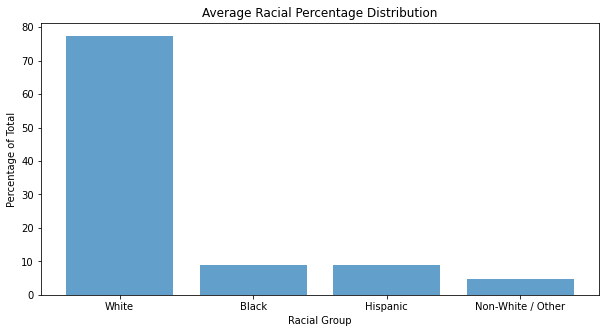

In [253]:
# Average Racial Percentage Distribution.

# Creating the variables used within the bar chart.
white_avg = demographic_df['white_pct'].mean()
black_avg = demographic_df['black_pct'].mean()
hispanic_avg = demographic_df['hispanic_pct'].mean()
nonwhite_avg = demographic_df['nonwhite_pct'].mean()

objects = ('White', 'Black', 'Hispanic', 'Non-White / Other')
y_pos = np.arange(len(objects))
race_avg = [white_avg, black_avg, hispanic_avg, nonwhite_avg]

# Plotting the data
plt.figure(figsize=(10, 5))

plt.bar(y_pos, race_avg, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage of Total')
plt.xlabel('Racial Group')
plt.title('Average Racial Percentage Distribution')

plt.show()

In the above Average Racial Percentage Distribution bar chart, we can visualize the mean of each racial group which we have divided into four different categories: White population, Black population, Hispanic population, and other Non-White populations. Through this we can see the disparity between the racial groups and clearly identify the majority. In this case, the visualization supports our initial understanding of the American population where we estimated that over 70% of the American population belongs to the White population. This can give us a better understanding of who the voters are, how they are divided racially, and we can analyze further to understand what may drive each of these groups.

### 2. Age Percentage Distribution

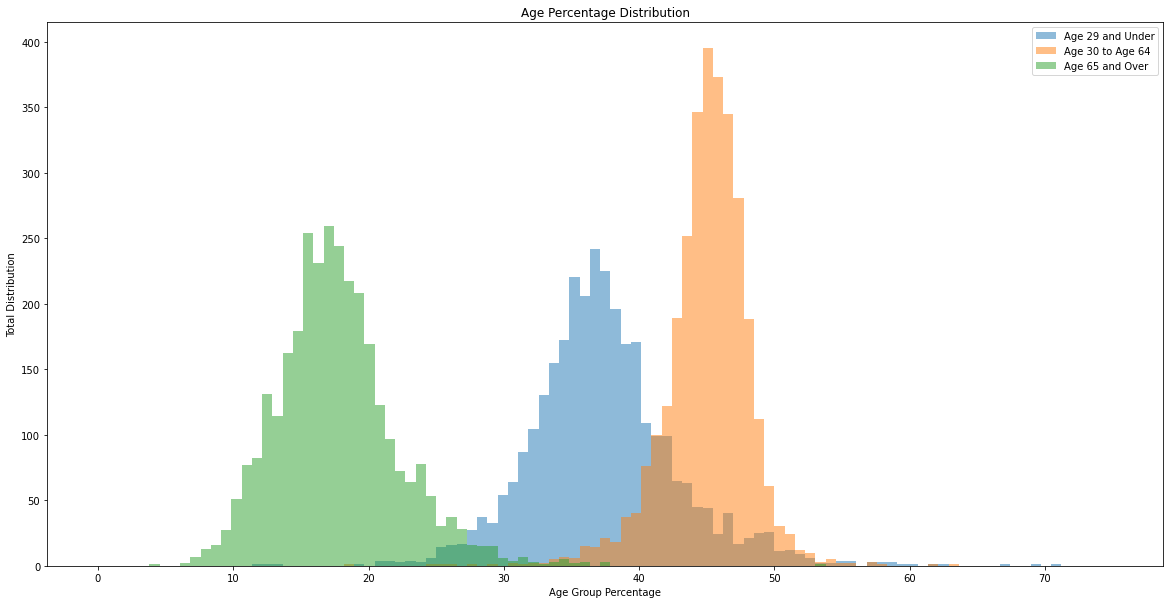

In [255]:
# Age Percentage Distribution.

# Creating the variables used within the histogram.
age29under = demographic_df['age_29_and_under_pct']
age30to64 = demographic_df['age_30_to_age_64_pct']
age65over = demographic_df['age_65_and_older_pct']

# Configuring the figure/chart size.
plt.figure(figsize=(20, 10))

# Configuring the bins for the histogram data.
bins = np.linspace(0, 75, 100)

# Plotting the data
plt.hist(age29under, bins, alpha=0.5, label='Age 29 and Under')
plt.hist(age30to64, bins, alpha=0.5, label='Age 30 to Age 64')
plt.hist(age65over, bins, alpha=0.5, label='Age 65 and Over')
plt.xlabel('Age Group Percentage')
plt.ylabel('Total Distribution')
plt.title('Age Percentage Distribution')
plt.legend(loc='upper right')

plt.show()

In the above Age Percentage Distribution histogram, we can visually see the representation of each age group and the amount that they fall into with regards to each bucket (bin). We have divided into three different categories which show the percentage of the population: Age 29 and Under `(blue)`, Age 30 to Age 64 `(orange)`, and Age 65 and Over `(green)`. Through this we can see the groups divided amongst the total population throughout America, in which case here we see that there is a large percentage of the overall population that is age 30 to age 64. Population aged 29 and under are second behind, with the next highest overall percentage of the population. And lastly, we have the older generation of the population aged 65 and over which comprises the remaining percentage of the overall population. This allows us to get an in depth look at what age groups our population/voters are and gives us a better understand of the expectations they may have from a future president.

### 3. Level of Education Percentage -VS- Unemployment Percentage in Civilian Labor Force

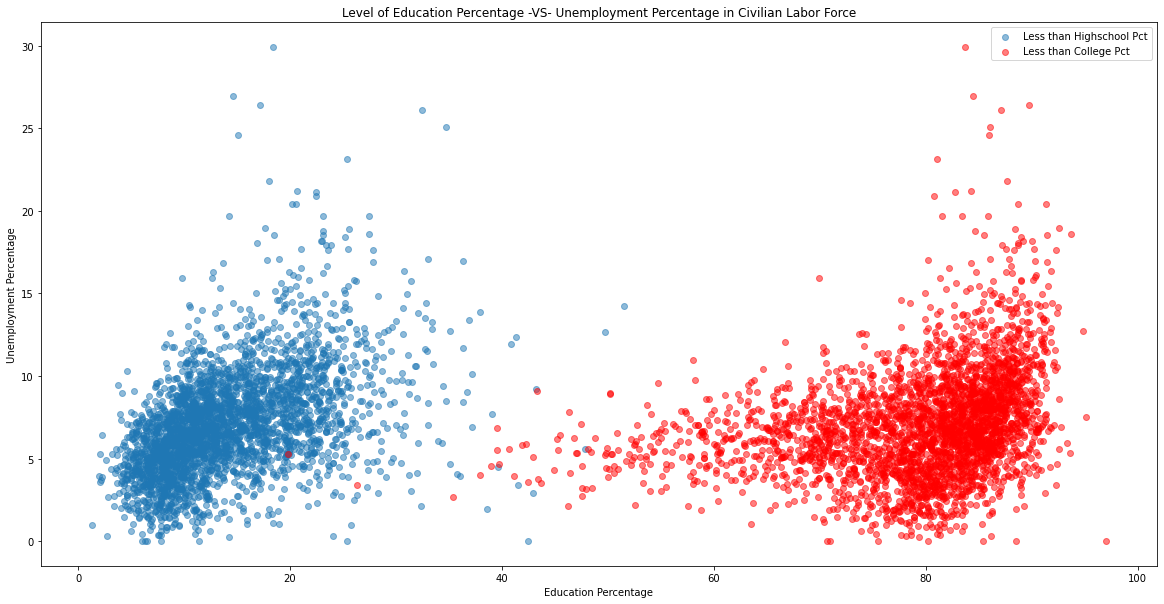

In [262]:
# Level of Education Percentage -VS- Unemployment Percentage in Civilian Labor Force.

# Configuring the figure/chart size.
plt.figure(figsize=(20, 10))

# Plotting the data
plt.scatter(demographic_df['less_than_highschool_pct'], demographic_df['unemployed_pct_in_civilian_labor_force'], alpha=0.5, label = 'Less than Highschool Pct')
plt.scatter(demographic_df['less_than_college_pct'], demographic_df['unemployed_pct_in_civilian_labor_force'], c='r', alpha=0.5, label = 'Less than College Pct')
plt.xlabel('Education Percentage')
plt.ylabel('Unemployment Percentage')
plt.title('Level of Education Percentage -VS- Unemployment Percentage in Civilian Labor Force')
plt.legend(loc='best')

plt.show()

The above scatter plot is a representation of the Level of Education Percentage in relation to the Unemployment Percentage in Civilian Labor Force. Here we look at the percentage of the population that has less than a highschool diploma `(blue)` and compare it to that of the population with less than a college diploma `(red)` in relation to a counties unemployment percentage in civilian labor force. As we can see within the visualization, the majority of the data is clustered in between an unemployment percentage of about ~1% and 15% with only a few outliers with very high unemployment percentages. We can deduce that the reason why less than college percentage is much higher than the less than highschool percentage can be somewhat attributed to the fact of course many of those who do not complete a highschool diploma are unable to proceed onward to college. But we can also say that relative relation of both of these columns is very similar in relation to the unemployment percentage in civilian labor force and neither can be singled out as being more a contributor to the unemployment percentage than the other.  

### 4. Unemployment Percentage relative to Female Population

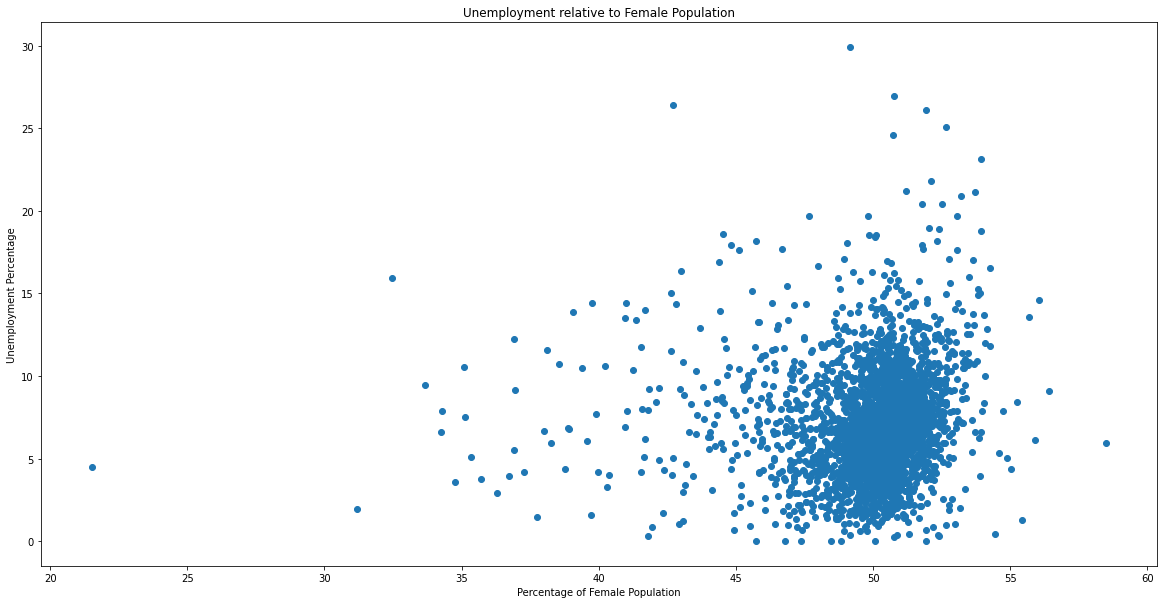

In [263]:
# Unemployment Percentage relative to Female Population.

# Configuring the figure/chart size.
plt.figure(figsize=(20, 10))

# Plotting the data
plt.scatter(demographic_df['female_pct'], demographic_df['unemployed_pct_in_civilian_labor_force'])
plt.xlabel('Percentage of Female Population')
plt.ylabel('Unemployment Percentage')
plt.title('Unemployment relative to Female Population')

plt.show()

Lastly, we have the the above visualized scatter plot which is a representation of the Unemployment Percentage relative to Female Percentage of the Population. This may seem quite familiar when looking back at the previous scatter plot, and thats because the data points are actually quite similar in representation as the less than college percent in relation to unemployment percentage. This could indicate that maybe the reason why both the unemployment percentage is high but also why its clustered around the same area as the less than college percentage data, and this reason may be because within these counties many of the women start families and no longer hold a job/career.